In [1]:
import pandas as pd
data = pd.read_csv('./Narrativedata.csv',index_col=0)

In [8]:
data
from sklearn.impute import SimpleImputer
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")

data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())

In [9]:
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])



In [11]:
from sklearn.preprocessing import OrdinalEncoder
data_ = data.copy()
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [13]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
enc = OneHotEncoder(categories='auto').fit_transform(X).toarray()
data

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0
...,...,...,...,...
886,27.0,male,S,0
887,19.0,female,S,2
888,28.0,female,S,0
889,26.0,male,C,1


处理连续性特诊：二值化与分段

In [14]:
data_2=data.copy()
from sklearn.preprocessing import Binarizer
x=data_2.iloc[:,0].values.reshape(-1,1)
transformer=Binarizer(threshold=30).fit_transform(x)
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [31]:
from sklearn.preprocessing import KBinsDiscretizer

print(data.iloc[:,0])
print(data.iloc[:,0].values.reshape(-1,1))
#X = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

print(set(est.fit_transform(X).ravel()))
#est.fit_transform(X)
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
est.fit_transform(X).toarray()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
[[22.  ]
 [38.  ]
 [26.  ]
 [35.  ]
 [35.  ]
 [28.  ]
 [54.  ]
 [ 2.  ]
 [27.  ]
 [14.  ]
 [ 4.  ]
 [58.  ]
 [20.  ]
 [39.  ]
 [14.  ]
 [55.  ]
 [ 2.  ]
 [28.  ]
 [31.  ]
 [28.  ]
 [35.  ]
 [34.  ]
 [15.  ]
 [28.  ]
 [ 8.  ]
 [38.  ]
 [28.  ]
 [19.  ]
 [28.  ]
 [28.  ]
 [40.  ]
 [28.  ]
 [28.  ]
 [66.  ]
 [28.  ]
 [42.  ]
 [28.  ]
 [21.  ]
 [18.  ]
 [14.  ]
 [40.  ]
 [27.  ]
 [28.  ]
 [ 3.  ]
 [19.  ]
 [28.  ]
 [28.  ]
 [28.  ]
 [28.  ]
 [18.  ]
 [ 7.  ]
 [21.  ]
 [49.  ]
 [29.  ]
 [65.  ]
 [28.  ]
 [21.  ]
 [28.5 ]
 [ 5.  ]
 [11.  ]
 [22.  ]
 [38.  ]
 [45.  ]
 [ 4.  ]
 [28.  ]
 [28.  ]
 [29.  ]
 [19.  ]
 [17.  ]
 [26.  ]
 [32.  ]
 [16.  ]
 [21.  ]
 [26.  ]
 [32.  ]
 [25.  ]
 [28.  ]
 [28.  ]
 [ 0.83]
 [30.  ]
 [22.  ]
 [29.  ]
 [28.  ]
 [28.  ]
 [17.  ]
 [33.  ]
 [16.  ]
 [28.  ]
 [23.  ]
 [24.  ]
 [29.  ]
 [20.  ]
 

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

特征过程

In [37]:
#Filter过滤法#
dd=pd.read_csv('./digit recognizor.csv'
              )
x=dd.iloc[:,1:]
y=dd.iloc[:,0]
print(x)
x.shape

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

(42000, 784)

In [39]:
#方差过滤
#过滤的是方差为0的情况。当然可以选择一个值来过滤房差，
#！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
#！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
#问题：如何观察方差的分布情况并选择一个合适的方差数值呢
#希望可以绘图解决这个问题
from sklearn.feature_selection import VarianceThreshold
V=VarianceThreshold()
x_var_jian0=V.fit_transform(x)
print(x_var_jian0)
x_var_jian0.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(42000, 708)

最近邻算法KNN，单棵决策树，支持向量机SVM，神经网络，回归算法，都需要遍历特征或升维来进行运算本身的运算量就很大，需要的时间就很长，因此方差过滤这样的特征选择对他们来说就尤为重要，然而，随机森林则不然，所以方差过滤在遍历算法中有明显作用

过滤完方差，进行相关性过滤：三种基本方法

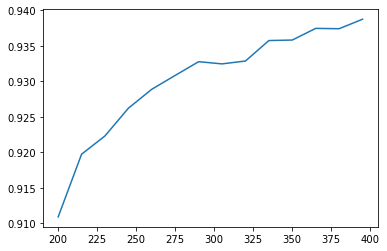

In [41]:
#1卡方过滤(离散型标签（即分类问题）的相关性过滤)
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
scorel=[]
for i in range(200,400,15):
    x_f=SelectKBest(chi2,k=i).fit_transform(x,y)
    sc=cross_val_score(rfc(n_estimators=10,random_state=12),x_f,y,cv=5).mean()
    scorel.append(sc)

plt.plot(range(200,400,15),scorel)
plt.show()

In [52]:
chivalue,pv=chi2(x,y)
print(chivalue.shape)
print(pv.shape)
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

#我们希望选取卡方值很大，p值小于0.05的特征，即和标签是相关联的特征。

(784,)
(784,)


708

In [53]:
#2，F检验：是用来捕捉每个特征与标签之间的线性关系的过滤方法，它即可以做回归也
#可以做分类
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(x,y)
print(F)
print(pvalues_f)
k = F.shape[0] - (pvalues_f > 0.05).sum()
k
`

[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
 9.97828619e-01 9.02721518e-01 1.00611948e+00 1.00611948e+00
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
 1.01692416e+00 1.35347192e+00 3.71248388e+00 5.77079787e+00
 8.50907642e+00 1.36616145e+01 2.50924014e+01 3.55288118e+01
 4.09177813e+01 3.82965430e+01 3.17363131e+01 2.72292727e+01
 2.45731983e+01 2.53220080e+01 2.28838975e+01 1.32355727e+01
 1.01035727e+01 3.96999541e+00 2.94784737e+00 1.17093592e+00
            nan            nan            nan            nan
            nan            nan 1.01692416e+00 1.01828946e+00
 2.54939887e+00 2.49625894e+00 8.38247202e+00 1.96339445e+01
 4.19875238e+01 7.865619

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 139 140 141 168 196 392 420 421 448 476 532 560 644 645
 671 672 673 699 700 701 727 728 729 730 731 754 755 756 757 758 759 760
 780 781 782 783] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


736

In [54]:
#SelectKBest选取最佳的特征数量K
#3.互信息法,，F检验只能够找出线性关系，而互信息法可以找出任意关系。
#捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法
#它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间
#取值，为0则表示两个变量独立，为1则表示两个变量完全相关。
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x,y)
print(result)
k = result.shape[0] - sum(result <= 0)
k



[0.00000000e+00 4.13485126e-04 3.62064896e-03 5.86579013e-03
 0.00000000e+00 4.76964557e-03 0.00000000e+00 5.48371888e-03
 1.15096860e-03 1.05645830e-02 0.00000000e+00 1.18302308e-03
 5.48002416e-03 0.00000000e+00 8.45001859e-04 0.00000000e+00
 0.00000000e+00 1.23635234e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.01225162e-04 5.48411589e-03 0.00000000e+00
 3.68029722e-03 3.73884116e-04 6.59011107e-03 2.41831629e-03
 6.40003056e-03 2.12051133e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.62602066e-04 0.00000000e+00 2.59882218e-03
 1.37829279e-04 0.00000000e+00 6.65313273e-04 1.09562098e-03
 3.28451813e-03 2.20895821e-03 7.19496182e-03 1.41696901e-03
 2.97451231e-03 3.37748390e-03 1.90537557e-03 3.65996719e-03
 6.11573655e-04 0.00000000e+00 1.05584374e-03 2.93630228e-03
 0.00000000e+00 1.49509598e-03 0.00000000e+00 0.00000000e+00
 2.56074433e-03 3.74410233e-03 0.00000000e+00 2.07004643e-03
 0.00000000e+00 4.72863708e-03 1.89997667e-03 0.00000000e+00
 5.10522863e-03 9.074261

696

Embedded嵌入法
用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。这些权值系数往往代表了特征对于模型的某种贡献或某种重要性
SelectFromModel是一个元变换器，可以与任何在拟合后具有coef_，feature_importances_属性或参数中可选惩
罚项的评估器一起使用用（比如随机森林和树模型就具有属性feature_importances_，逻辑回归就带有l1和l2惩罚
项，线性支持向量机也支持l2惩罚项


In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
RFC_ = RFC(n_estimators =10,random_state=0)
X_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
#只能够分到大约0.001的feature_importances_
print(X_embedded.shape)

#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值


(42000, 279)


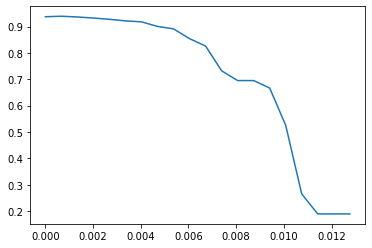

In [68]:
#======【TIME WARNING：10 mins】======#
import numpy as np
RFC_.fit(x,y).feature_importances_

threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

Wrapper包装法
它也是依赖于算法自身的选择，比如
coef_属性或feature_importances_属性来完成特征选择。但不同的是，我们往往使用一个目标函数作为黑盒来帮助我们选取特征，而不是自己输入某个评估指标或统计量的阈值。包装法在初始特征集上训练评估器，


In [70]:
from sklearn.feature_selection import RFE

RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(x, y)
print(selector.support_)
print(selector.ranking_)
X_wrapper = selector.transform(x)
print(X_wrapper)
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False Fa

0.9379761904761905

过滤法更快速，但更粗糙。包装法和嵌入法更精确，比较适合具体到算
法去调整，但计算量比较大，运行时间长。当数据量很大的时候，优先使用方差过滤和互信息法调整，再上其他特征选择方法。使用逻辑回归时，优先使用嵌入法。使用支持向量机时，优先使用包装法。